In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("/content/new dataset.csv")


In [ ]:
df.isna().sum()


,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
hypertension,0
heart_disease,0
smoking_history,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,Outcome
0,148,72,35,0,33.6,0.627,50,1,1,0,6.6,140,1
1,85,66,29,0,26.6,0.351,31,0,0,0,6.6,80,0
2,183,64,0,0,23.3,0.672,32,0,0,0,5.7,158,1
3,89,66,23,94,28.1,0.167,21,0,0,1,5.0,155,0
4,137,40,35,168,43.1,2.288,33,0,1,1,4.8,155,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   hypertension              768 non-null    int64  
 8   heart_disease             768 non-null    int64  
 9   smoking_history           768 non-null    int64  
 10  HbA1c_level               768 non-null    float64
 11  blood_glucose_level       768 non-null    int64  
 12  Outcome                   768 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 78.1 KB


In [ ]:
df.isna().sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
hypertension,0
heart_disease,0
smoking_history,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","hypertension","heart_disease","smoking_history","HbA1c_level","blood_glucose_level","Outcome"]

In [ ]:
df["Outcome"].unique()
df["smoking_history"].unique()


array([0, 1])

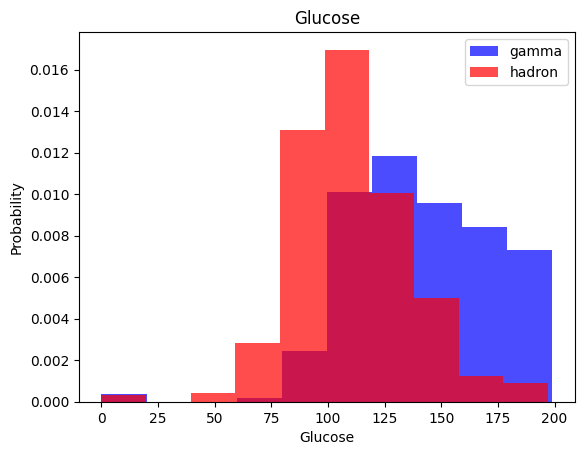

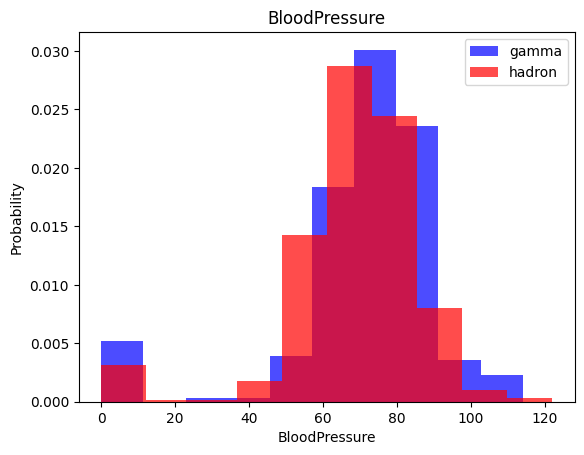

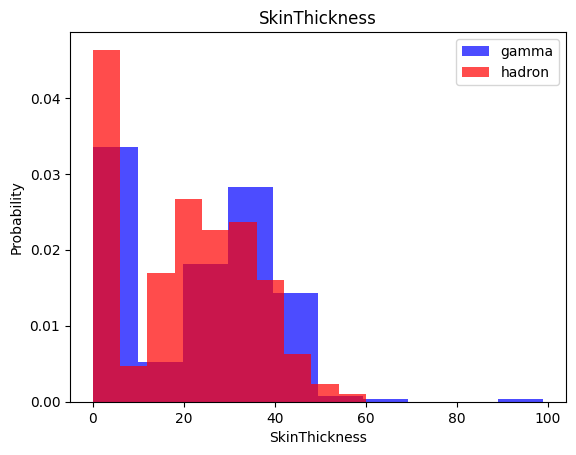

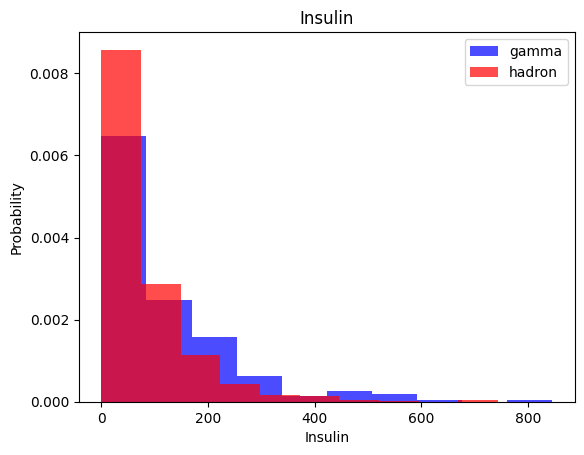

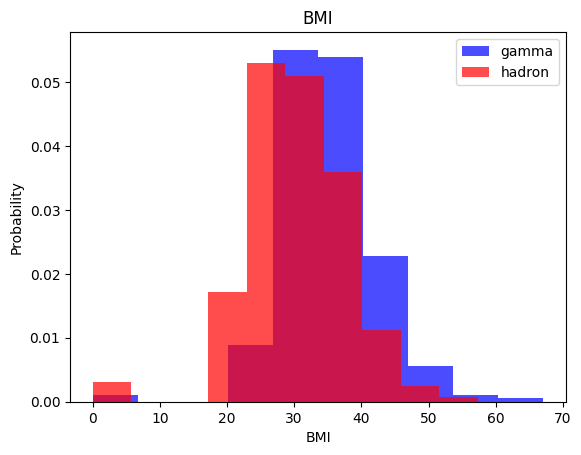

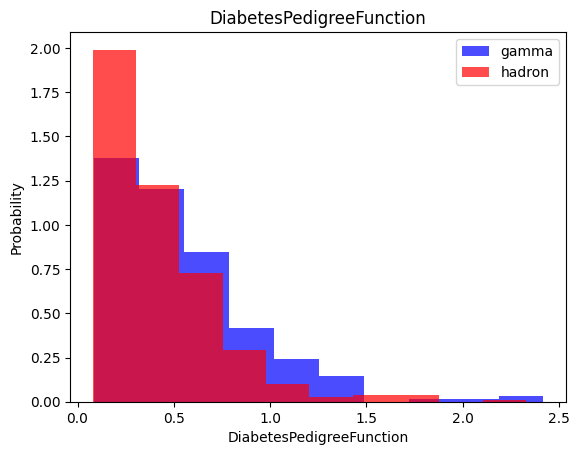

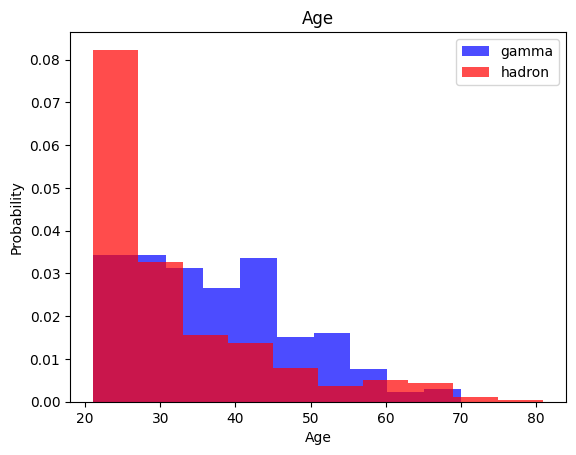

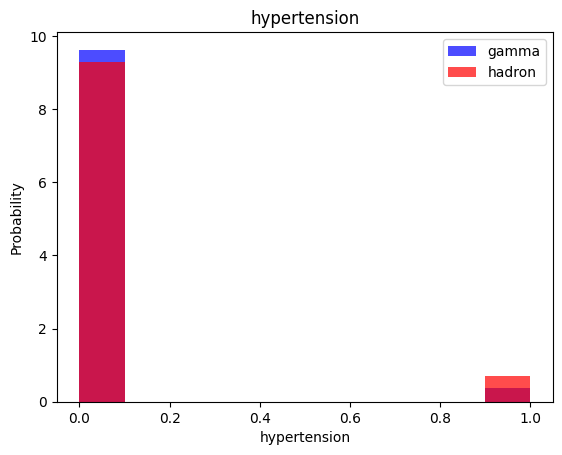

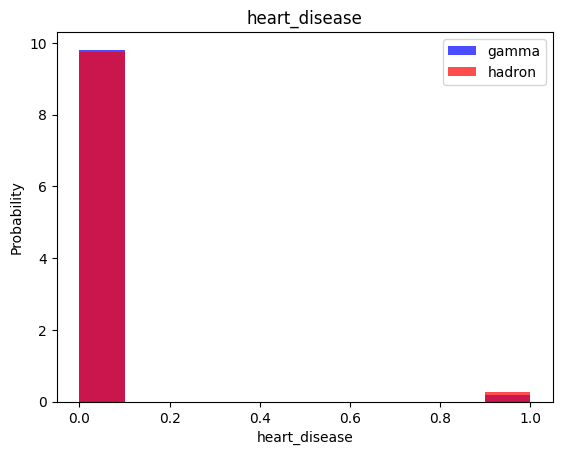

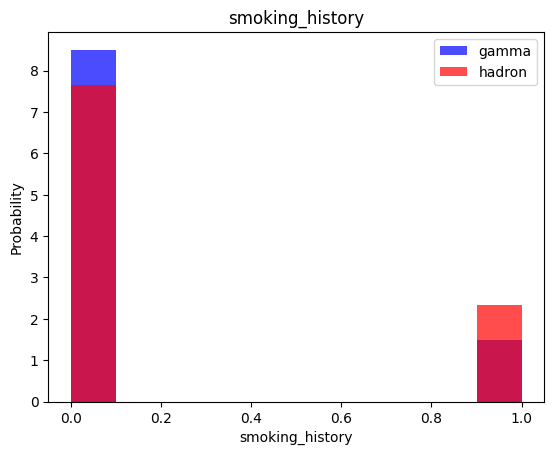

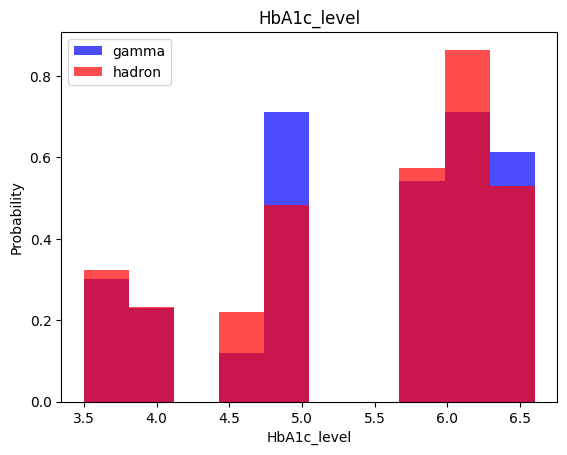

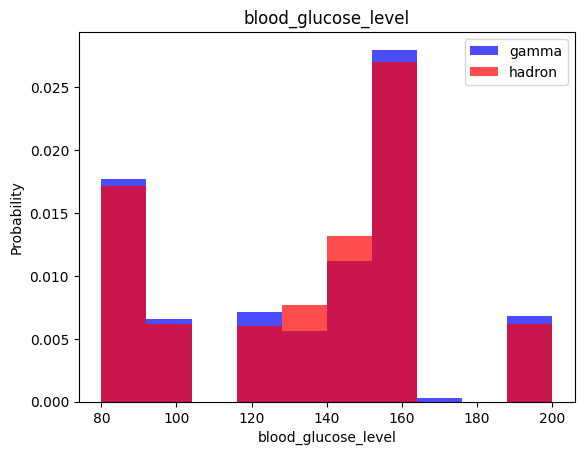

In [ ]:
# Relation between features and target Outcome
for label in cols[:-1]:
  plt.hist(df[df["Outcome"]==1][label], color='blue',label='gamma',alpha=0.7,density='true')
  plt.hist(df[df["Outcome"]==0][label], color='red',label='hadron',alpha=0.7,density='true')
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

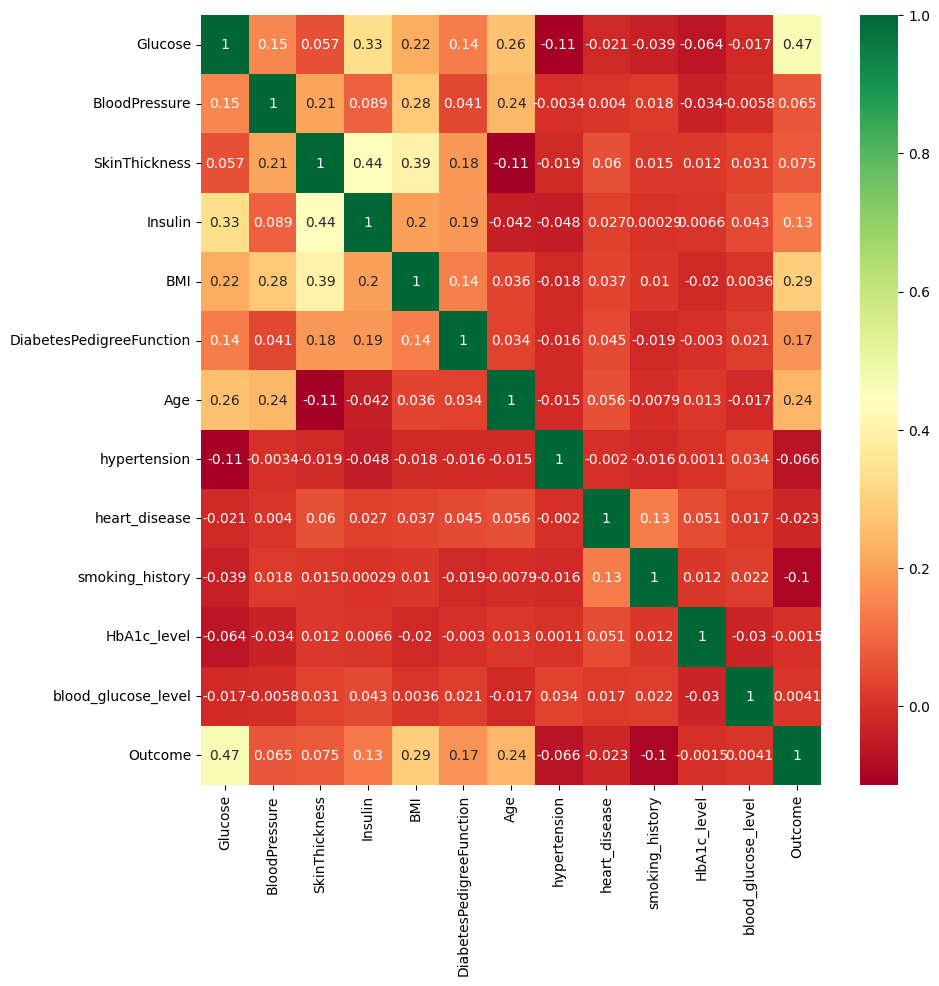

In [ ]:
#Corelation analysis
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Train Valid Test

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Scale dataset if it is too variate
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  # Fit and Transform x
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  #Whole data as huge 2D numpy array : Combining Features and Target
  data = np.hstack((X,np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
# print(len(train[train["Outcome"] == 1])) - 151
# print(len(train[train["Outcome"] == 0])) - 309

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
#Since for have not seen valid and test oversample is set to false
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


In [ ]:
sum(y_train==1)

304

In [ ]:
sum(y_train==0)

304

In [ ]:
len(X_train==0)

608

#knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)


In [ ]:
print("KNN Classification_Report on New Dataset")
print(classification_report(y_test, y_pred))

KNN Classification_Report on New Dataset
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        98
           1       0.72      0.82      0.77        56

    accuracy                           0.82       154
   macro avg       0.80      0.82      0.81       154
weighted avg       0.83      0.82      0.82       154



In [ ]:
from sklearn import metrics
Accuracy_knn2 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy of KNN Model2: ",Accuracy_knn2*100)

Accuracy of KNN Model2:  81.81818181818183


#Confusion Matrix



In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
result1 = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result1)

Confusion Matrix:
[[80 18]
 [10 46]]


<Axes: >

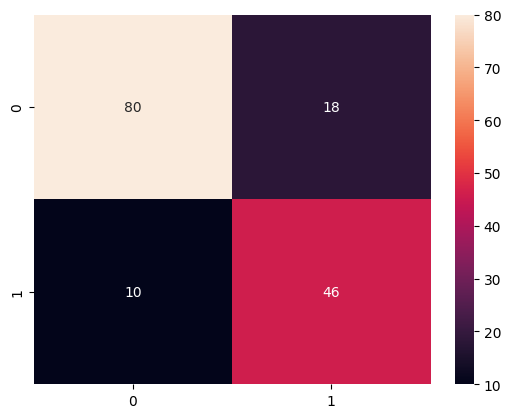

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test,y_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Classification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 80
FP - False Positive 18
FN - False Negative 10
TP - True Positive 46
Accuracy Rate: 81.81818181818183
Classification Rate: 18.181818181818183


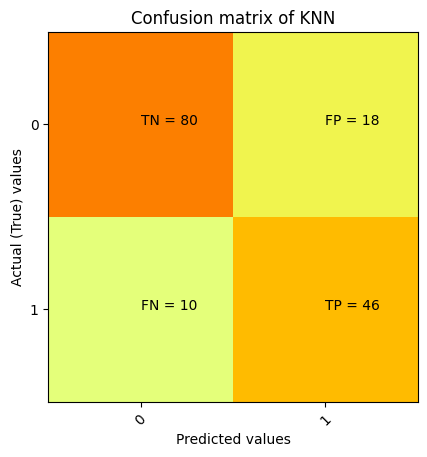

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title("Confusion matrix of KNN")
plt.ylabel("Actual (True) values")
plt.xlabel("Predicted values")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#AUC

In [ ]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,y_pred)*100,2)
print('roc_auc_score of KNN:',auc)

roc_auc_score of KNN: 81.89


<function matplotlib.pyplot.show(close=None, block=None)>

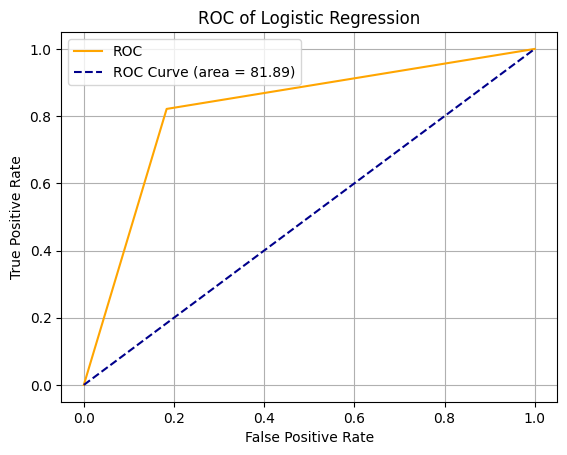

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC Curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Logistic Regression')
plt.legend()
plt.grid()
plt.show

#SVM

In [ ]:
from sklearn.svm import SVC


In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_predd = svm_model.predict(X_test)
print("SVM Classification_Report on new dataset")
print(classification_report(y_test,y_predd))


SVM Classification_Report on new dataset
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        98
           1       0.75      0.80      0.78        56

    accuracy                           0.83       154
   macro avg       0.82      0.83      0.82       154
weighted avg       0.83      0.83      0.83       154



In [ ]:
from sklearn import metrics
Accuracy_svm2 = metrics.accuracy_score(y_test,y_predd)
print("Accuracy of SVM Model2: ",Accuracy_svm2*100)

Accuracy of SVM Model2:  83.11688311688312


#Confusion Matrix

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
result1 = metrics.confusion_matrix(y_test, y_predd)
print("Confusion Matrix:")
print(result1)

Confusion Matrix:
[[83 15]
 [11 45]]


<Axes: >

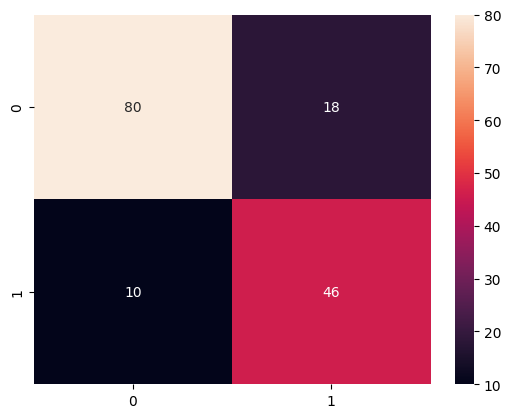

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test,y_predd)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Classification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 83
FP - False Positive 15
FN - False Negative 11
TP - True Positive 45
Accuracy Rate: 83.11688311688312
Classification Rate: 16.883116883116884


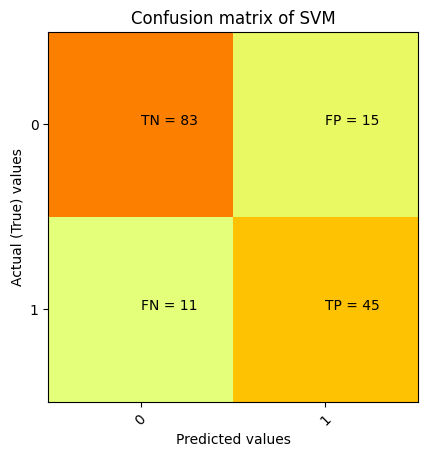

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title("Confusion matrix of SVM")
plt.ylabel("Actual (True) values")
plt.xlabel("Predicted values")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#AUC

In [ ]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,y_predd)*100,2)
print('roc_auc_score of SVM:',auc)

roc_auc_score of SVM: 82.53


<function matplotlib.pyplot.show(close=None, block=None)>

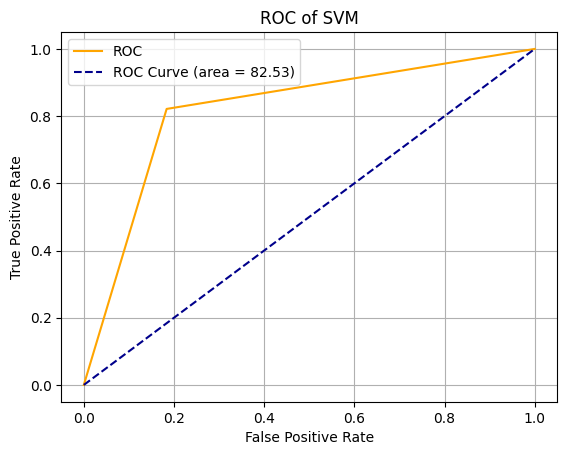

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC Curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of SVM')
plt.legend()
plt.grid()
plt.show

#Xgboost

In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf',XGBClassifier(random_state=8))
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [ ]:
# used scikit-optimize for hp tuning
from skopt import BayesSearchCV   #SKlearn search wrapper
from skopt.space import Real, Categorical, Integer


# set up ranges
search_space = {
    #name of xgb classifier estimator__ hyperparameter name
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}
                   #                   number of folds   iterations
opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=8)

In [ ]:
opt.fit(X_train, y_train)


BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [ ]:
opt.best_estimator_


Pipeline(steps=[('encoder', TargetEncoder(cols=[])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.9425384185492701,
                               colsample_bynode=0.9095956806239844,
                               colsample_bytree=0.706128679361455, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1.6598135411398998,
                               g...None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.7929828265552742, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=8, ...))])

In [ ]:
opt.score(X_test, y_test)


0.8611516034985423

In [ ]:
y_p = opt.predict(X_test)


In [ ]:
opt.predict_proba(X_test)


array([[0.6249798 , 0.3750202 ],
       [0.6637186 , 0.3362814 ],
       [0.87651163, 0.12348839],
       [0.95534915, 0.04465086],
       [0.2218982 , 0.7781018 ],
       [0.5250485 , 0.47495148],
       [0.8219459 , 0.17805411],
       [0.6249798 , 0.3750202 ],
       [0.6689959 , 0.33100408],
       [0.56363654, 0.4363635 ],
       [0.7557564 , 0.24424365],
       [0.15513796, 0.84486204],
       [0.8720225 , 0.12797746],
       [0.21120173, 0.7887983 ],
       [0.41483754, 0.58516246],
       [0.27361095, 0.72638905],
       [0.95534915, 0.04465086],
       [0.56363654, 0.4363635 ],
       [0.8720225 , 0.12797746],
       [0.2190978 , 0.7809022 ],
       [0.41483754, 0.58516246],
       [0.9249165 , 0.07508349],
       [0.3657546 , 0.6342454 ],
       [0.5367428 , 0.46325722],
       [0.56363654, 0.4363635 ],
       [0.6637186 , 0.3362814 ],
       [0.39956462, 0.6004354 ],
       [0.7557564 , 0.24424365],
       [0.95534915, 0.04465086],
       [0.82465553, 0.17534447],
       [0.

In [ ]:
print("XGBoost Classification_Report on new dataset")
print(classification_report(y_test,y_p))

XGBoost Classification_Report on new dataset
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        98
           1       0.67      0.75      0.71        56

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



In [ ]:
from sklearn import metrics
Accuracy_xgg2 = metrics.accuracy_score(y_test,y_p)
print("Accuracy of XGG Model2: ",Accuracy_xgg2*100)

Accuracy of XGG Model2:  77.27272727272727


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
result1 = metrics.confusion_matrix(y_test, y_p)
print("Confusion Matrix:")
print(result1)

Confusion Matrix:
[[77 21]
 [14 42]]


<function matplotlib.pyplot.show(close=None, block=None)>

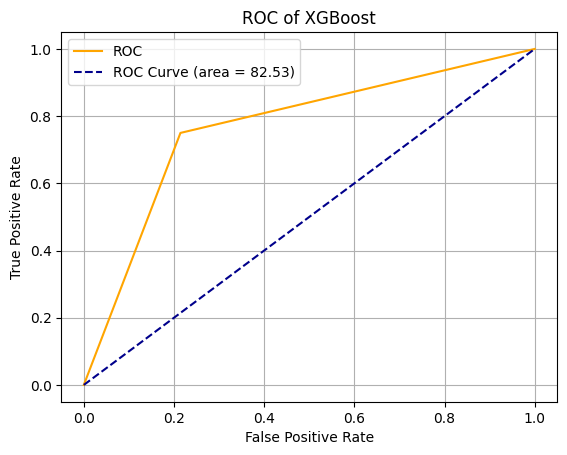

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_p)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC Curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of XGBoost')
plt.legend()
plt.grid()
plt.show

#Comparision between models


In [ ]:
Accuracy = {'KNN':63.63,'SVM':70.77,'XGBoost':77.27}
xlabels = list(Accuracy.keys())
ylabels = list(Accuracy.values())

Text(0.5, 1.0, 'Comparision between Models in Created Dataset')

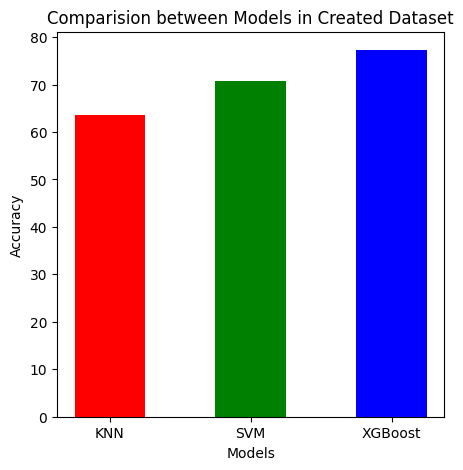

In [ ]:
plt.figure(figsize=(5,5))
color = ['red','green','blue']
plt.bar(xlabels,ylabels,color=color,width=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparision between Models in Created Dataset')